In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import data_utils
import model_utils
import model

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np

In [5]:
data = data_utils.load_training_data()

In [6]:
# To get reasonable outputs, should use something bigger than 150 !
num_epochs = 1000 

In [7]:
model_utils.reset_session_and_model()
with tf.Session() as sess:
    train_config = model.ModelConfig()
    test_config = model.ModelConfig()
    #train_config.num_layers = 1
    #test_config.num_layers = 1
    test_config.batch_size = 1
    test_config.num_steps = 1
    loader = data_utils.DataLoader(data=data,batch_size=train_config.batch_size, num_steps=train_config.num_steps)
    train_model = model.RNNModel(train_config, True)
    test_model = model.RNNModel(test_config, False)
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    for idx in range(num_epochs):
        epoch_loss = train_model.train_for_epoch(sess, loader)
        print(idx, ' ', epoch_loss)
        if (idx+1) % 100 == 0:
            saver.save(sess, './models/multirnnmodel.ckpt', global_step=idx)
    sample_preds = test_model.predict(sess, seq_len=4000)


AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

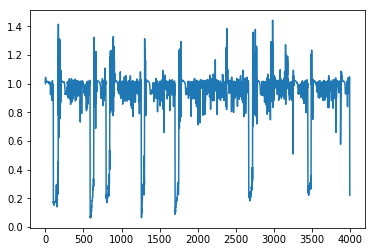

In [54]:
plt.plot(sample_preds)